In [2]:
import pandas as pd
import numpy as np
import lasio 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
## plotly imports
import plotly as py
import plotly.express as px
import plotly.io as pio
from plotly import __version__
print(__version__)
from chart_studio.plotly import plot, iplot 
import plotly.graph_objs as go

4.11.0


In [4]:
las = lasio.read(r'C:\Users\14695\OneDrive\Geology Data\East Texas\Haley #1\UNIT PETROLEUM HALEY#1 MAIN PASS VER02.LAS')

In [5]:
las.curves

[CurveItem(mnemonic="DEPT", unit="FT", value="0 000 00 00", descr="Depth", original_mnemonic="DEPT", data.shape=(45977,)),
 CurveItem(mnemonic="A1VRM2W", unit="Ohm-m", value="", descr="Array Induction 2 Foot Resistivity 10" DOI", original_mnemonic="A1VRM2W", data.shape=(45977,)),
 CurveItem(mnemonic="A2VRM2W", unit="Ohm-m", value="", descr="Array Induction 2 Foot Resistivity 20" DOI", original_mnemonic="A2VRM2W", data.shape=(45977,)),
 CurveItem(mnemonic="A3VRM2W", unit="Ohm-m", value="", descr="Array Induction 2 Foot Resistivity 30" DOI", original_mnemonic="A3VRM2W", data.shape=(45977,)),
 CurveItem(mnemonic="A4VRM2W", unit="Ohm-m", value="", descr="Array Induction 2 Foot Resistivity 60" DOI", original_mnemonic="A4VRM2W", data.shape=(45977,)),
 CurveItem(mnemonic="A5VRM2W", unit="Ohm-m", value="", descr="Array Induction 2 Foot Resistivity 90" DOI", original_mnemonic="A5VRM2W", data.shape=(45977,)),
 CurveItem(mnemonic="ABHV", unit="ft3", value="", descr="Annular Volume", original_mnem

In [6]:
df=las.df()
df.head()

A1VRM2W  A2VRM2W  A3VRM2W  A4VRM2W  A5VRM2W       ABHV    CNPOR  DCAL  \
DEPT                                                                            
256.00      NaN      NaN      NaN      NaN      NaN  2923.2417  94.8388   NaN   
256.25      NaN      NaN      NaN      NaN      NaN  2923.2417  87.9177   NaN   
256.50      NaN      NaN      NaN      NaN      NaN  2923.2417  82.0964   NaN   
256.75      NaN      NaN      NaN      NaN      NaN  2923.2417  79.4983   NaN   
257.00      NaN      NaN      NaN      NaN      NaN  2923.2417  78.9348   NaN   

         DFCAL  DPHI    DRHO       GR    GRTEMP    MUDR  PEF  RHOB  RWA  \
DEPT                                                                      
256.00 -6.3490   NaN -0.3166  22.1438  119.5595  0.3852  NaN   NaN  NaN   
256.25 -6.3484   NaN -0.3094  21.4286  119.4215  0.3851  NaN   NaN  NaN   
256.50 -6.3484   NaN -0.2981  21.4409  119.4080  0.3830  NaN   NaN  NaN   
256.75 -6.3484   NaN -0.2865  22.0765  119.4875  0.3851  NaN   NaN  NaN   
257.00 -6.3490   NaN -0.2800  22.9730  119.5160  0.3858  NaN   NaN  NaN   

        RXORT       TBHV  
DEPT                      
256.00    NaN  4359.2056  
256.25    NaN  4359.1899  
256.50    NaN  4359.1899  
256.75    NaN  4359.1743  
257.00    NaN  4359.1743

In [7]:
df.shape

(45977, 19)

In [8]:
df.columns


Index(['A1VRM2W', 'A2VRM2W', 'A3VRM2W', 'A4VRM2W', 'A5VRM2W', 'ABHV', 'CNPOR',
       'DCAL', 'DFCAL', 'DPHI', 'DRHO', 'GR', 'GRTEMP', 'MUDR', 'PEF', 'RHOB',
       'RWA', 'RXORT', 'TBHV'],
      dtype='object')

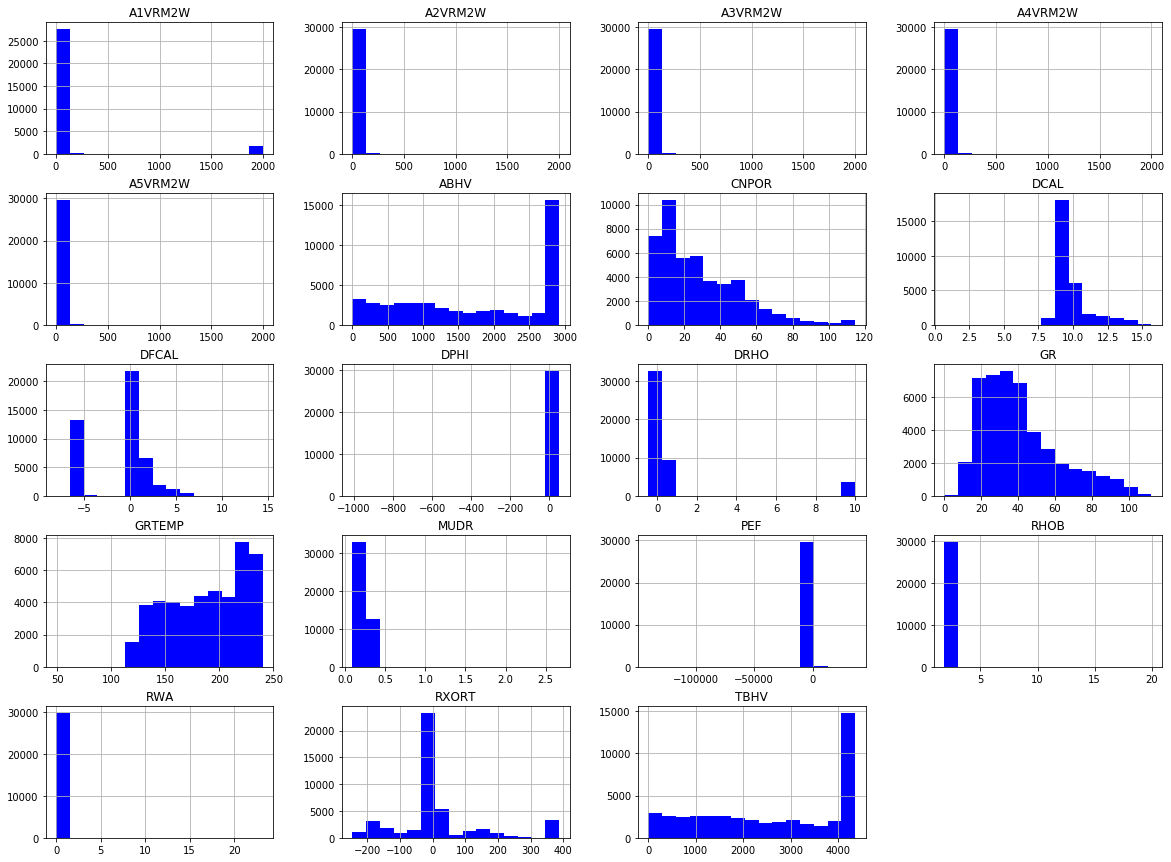

In [10]:
df.hist(bins=15,figsize=(20,15),color='blue' )
plt.show()

In [11]:
df=df.rename(columns={'DEPT':'Depth', 'A5VRM2W':'DeepRes', 'CNPOR':'NPHI'})
df=df.rename_axis('Depth').reset_index()

In [12]:
df.isna().sum()

Depth          0
A1VRM2W    16063
A2VRM2W    16063
A3VRM2W    16063
A4VRM2W    16063
DeepRes    16063
ABHV         360
NPHI         121
DCAL       16102
DFCAL        434
DPHI       16104
DRHO         436
GR           178
GRTEMP       536
MUDR         394
PEF        16104
RHOB       16104
RWA        16028
RXORT        738
TBHV         360
dtype: int64

In [13]:
df.head()

Depth  A1VRM2W  A2VRM2W  A3VRM2W  A4VRM2W  DeepRes       ABHV     NPHI  \
0  256.00      NaN      NaN      NaN      NaN      NaN  2923.2417  94.8388   
1  256.25      NaN      NaN      NaN      NaN      NaN  2923.2417  87.9177   
2  256.50      NaN      NaN      NaN      NaN      NaN  2923.2417  82.0964   
3  256.75      NaN      NaN      NaN      NaN      NaN  2923.2417  79.4983   
4  257.00      NaN      NaN      NaN      NaN      NaN  2923.2417  78.9348   

   DCAL   DFCAL  DPHI    DRHO       GR    GRTEMP    MUDR  PEF  RHOB  RWA  \
0   NaN -6.3490   NaN -0.3166  22.1438  119.5595  0.3852  NaN   NaN  NaN   
1   NaN -6.3484   NaN -0.3094  21.4286  119.4215  0.3851  NaN   NaN  NaN   
2   NaN -6.3484   NaN -0.2981  21.4409  119.4080  0.3830  NaN   NaN  NaN   
3   NaN -6.3484   NaN -0.2865  22.0765  119.4875  0.3851  NaN   NaN  NaN   
4   NaN -6.3490   NaN -0.2800  22.9730  119.5160  0.3858  NaN   NaN  NaN   

   RXORT       TBHV  
0    NaN  4359.2056  
1    NaN  4359.1899  
2    NaN  4359.1899  
3    NaN  4359.1743  
4    NaN  4359.1743

In [14]:
df_clean =df.dropna(axis=0, how='any')

In [15]:
df_clean.shape

(29413, 20)

In [16]:
df_select=df_clean[['GR','DeepRes','DPHI','NPHI','PEF']]
df_select.head()

GR    DeepRes    DPHI     NPHI       PEF
16028  21.1050  1999.9999  3.6189  20.1744   87.0988
16029  20.8725  1999.9999  0.1650  20.0014  124.2484
16030  20.6897  1999.9999 -1.9169  20.5876  164.1115
16031  20.6055  1999.9999 -3.2028  21.7756  208.7568
16032  20.5254  1999.9999 -4.3629  21.2927  287.4666

In [17]:
df_clean.describe().transpose()

count         mean          std          min        25%        50%  \
Depth    29413.0  7939.500000  2122.736518    4263.0000  6101.2500  7939.5000   
A1VRM2W  29413.0   135.755454   477.491777       0.7079     3.6422     6.9902   
A2VRM2W  29413.0    16.041710    98.816357       0.7926     3.5949     6.4706   
A3VRM2W  29413.0    18.598065   109.804723       0.8235     3.6164     6.6017   
A4VRM2W  29413.0    16.186327    93.154207       0.8736     3.6029     6.6110   
DeepRes  29413.0    15.587890    89.113778       0.8662     3.5841     6.6667   
ABHV     29413.0  1144.164879   750.154300       5.0834   514.6357  1039.4296   
NPHI     29413.0    15.444417     9.873424       0.3197     7.7983    12.6855   
DCAL     29413.0     9.807227     1.308052       8.3509     8.9974     9.2693   
DFCAL    29413.0     1.040595     1.309505      -0.3991     0.2417     0.4986   
DPHI     29413.0     8.224751    10.562294    -673.8869     4.3145     7.0727   
DRHO     29413.0     0.126173     0.152354      -0.3023     0.0630     0.1026   
GR       29413.0    47.275495    22.545600       5.1931    29.8479    42.4232   
GRTEMP   29413.0   210.482648    19.226826      48.7925   193.4975   215.1470   
MUDR     29413.0     0.173536     0.026092       0.0856     0.1546     0.1644   
PEF      29413.0     1.901223  1160.588845 -140492.6875     4.9948     7.1585   
RHOB     29413.0     2.569357     0.180615       1.8302     2.5298     2.5891   
RWA      29413.0     0.064491     0.249775       0.0000     0.0128     0.0330   
RXORT    29413.0   -14.005215    42.859844    -246.4029   -14.0836    -2.6536   
TBHV     29413.0  1754.814473  1098.493151       9.1747   821.9752  1650.0999   

               75%         max  
Depth    9777.7500  11616.0000  
A1VRM2W    14.8020   1999.9999  
A2VRM2W    10.9738   1999.9999  
A3VRM2W    11.1015   1999.9999  
A4VRM2W    11.1507   1999.9999  
DeepRes    11.3478   1999.9999  
ABHV     1777.2733   2705.0112  
NPHI       22.0508     74.7658  
DCAL       10.0561     15.6653  
DFCAL       1.2944      6.9153  
DPHI       10.5367     51.4477  
DRHO        0.1479     10.0000  
GR         61.7848    112.1684  
GRTEMP    226.9730    240.4775  
MUDR        0.1980      0.2318  
PEF        20.1165  36207.9961  
RHOB        2.6362     14.2335  
RWA         0.0725     23.2330  
RXORT       4.3405    310.5937  
TBHV     2691.1917   3922.2603

In [18]:
df_select['VSH'] = (df_select.GR - df_select.GR.min(axis=0)) / (df_select.GR.max(axis=0) - df_select.GR.min(axis=0))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df_clean['PEF'].describe()

count     29413.000000
mean          1.901223
std        1160.588845
min     -140492.687500
25%           4.994800
50%           7.158500
75%          20.116500
max       36207.996100
Name: PEF, dtype: float64

In [20]:
def log_plot(logs):
    logs = logs.sort_values(by='Depth')
    top = logs.Depth.min()
    bot = logs.Depth.max()
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(12,8))
    ax[0].plot(logs.GR, logs.Depth, color='black')
    ax[1].plot(logs.DeepRes, logs.Depth, color='red')
    ax[2].plot(logs.DPHI, logs.Depth, color='green')
    ax[3].plot(logs.NPHI, logs.Depth, color='blue')
    ax[4].plot(logs.PEF, logs.Depth, color='c')
    
    
    for i in range(len(ax)):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()
        
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[0].set_ylabel("Depth(ft)")
    ax[1].set_xlabel("DeepRes")
    ax[1].set_xlim(logs.DeepRes.min(),logs.DeepRes.max())
    ax[2].set_xlabel("DPHI")
    ax[2].set_xlim(logs.DPHI.min(),logs.DPHI.max())
    ax[3].set_xlabel("NPHI")
    ax[3].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[4].set_xlabel("PEF")
    ax[4].set_xlim(0,10)
   
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]);
    ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]) 
    
    f.suptitle('Well:Haley #1', fontsize=14,y=0.94)

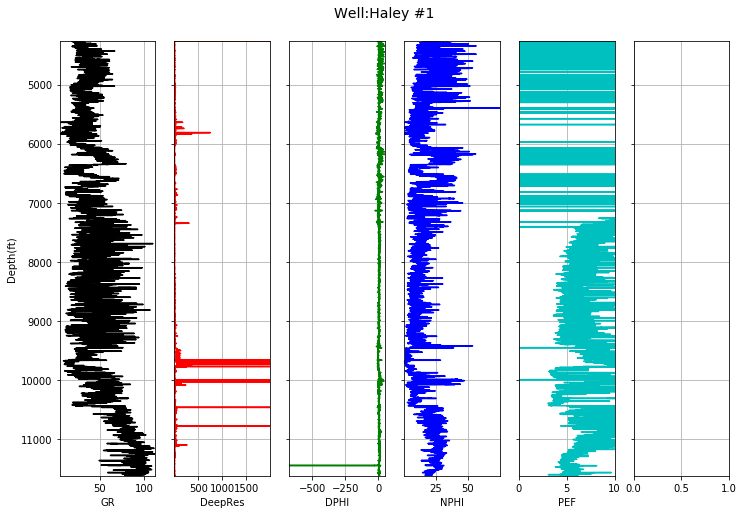

In [21]:
log_plot(df_clean)

In [22]:
df_clean['DPHI'].describe()

count    29413.000000
mean         8.224751
std         10.562294
min       -673.886900
25%          4.314500
50%          7.072700
75%         10.536700
max         51.447700
Name: DPHI, dtype: float64

In [23]:
fig = px.scatter(df_clean, x="NPHI", y="DeepRes", color="Depth",
                 size='DeepRes')
fig.update_layout(title_text= 'Modified Pickett Plot')
fig.update_layout(width=700,height=525)
fig.update_layout(margin={"r":0, "t":50,"l":1,"b":0})
fig.show()

In [28]:
fig = px.scatter(df_clean, x="NPHI", y="RHOB", color="Depth")
fig.update_layout(title_text= 'Neutron/Density Cross Plot')
fig.update_layout(width=700,height=525)
fig.update_layout(margin={"r":0, "t":50,"l":1,"b":0})
fig.show()